# Matriz de Confusão da base de dados com 121 DataSets

In [3]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

import numpy as np
from scipy import stats

from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading

df = pd.read_csv('datasets/outputSummaryOutputData-matriz.csv')
y_true, y_pred = df['y_true'], df['y_pred']

report_matrix = pd.crosstab(df['y_true'], df['y_pred'], rownames=["Original"], colnames=["Predict"], margins=False, normalize="index").round(4)*100

report_matrix["SmartCampus"] = 0
report_matrix = report_matrix[['Agriculture',	'HealthCare', 'IndependentLiving', 'IndustrialProcesses', 'Logistic', 'SecurityPublic', 'SmartCampus', 'SmartGrid', 'SmartHome',
'Undefined', 'UrbanMobility']]

report_matrix


Predict,Agriculture,HealthCare,IndependentLiving,IndustrialProcesses,Logistic,SecurityPublic,SmartCampus,SmartGrid,SmartHome,Undefined,UrbanMobility
Original,,,,,,,,,,,
Agriculture,100.0,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.0,0.00
HealthCare,0.0,100.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.0,0.00
IndependentLiving,0.0,58.33,41.67,0.00,0.00,0.00,0,0.00,0.00,0.0,0.00
IndustrialProcesses,0.0,0.00,0.00,91.67,8.33,0.00,0,0.00,0.00,0.0,0.00
Logistic,0.0,0.00,0.00,0.00,100.00,0.00,0,0.00,0.00,0.0,0.00
SecurityPublic,0.0,0.00,0.00,0.00,0.00,100.00,0,0.00,0.00,0.0,0.00
SmartCampus,0.0,0.00,0.00,0.00,0.00,83.33,0,16.67,0.00,0.0,0.00
SmartGrid,0.0,0.00,0.00,0.00,0.00,0.00,0,100.00,0.00,0.0,0.00
SmartHome,0.0,0.00,0.00,0.00,0.00,16.67,0,0.00,83.33,0.0,0.00


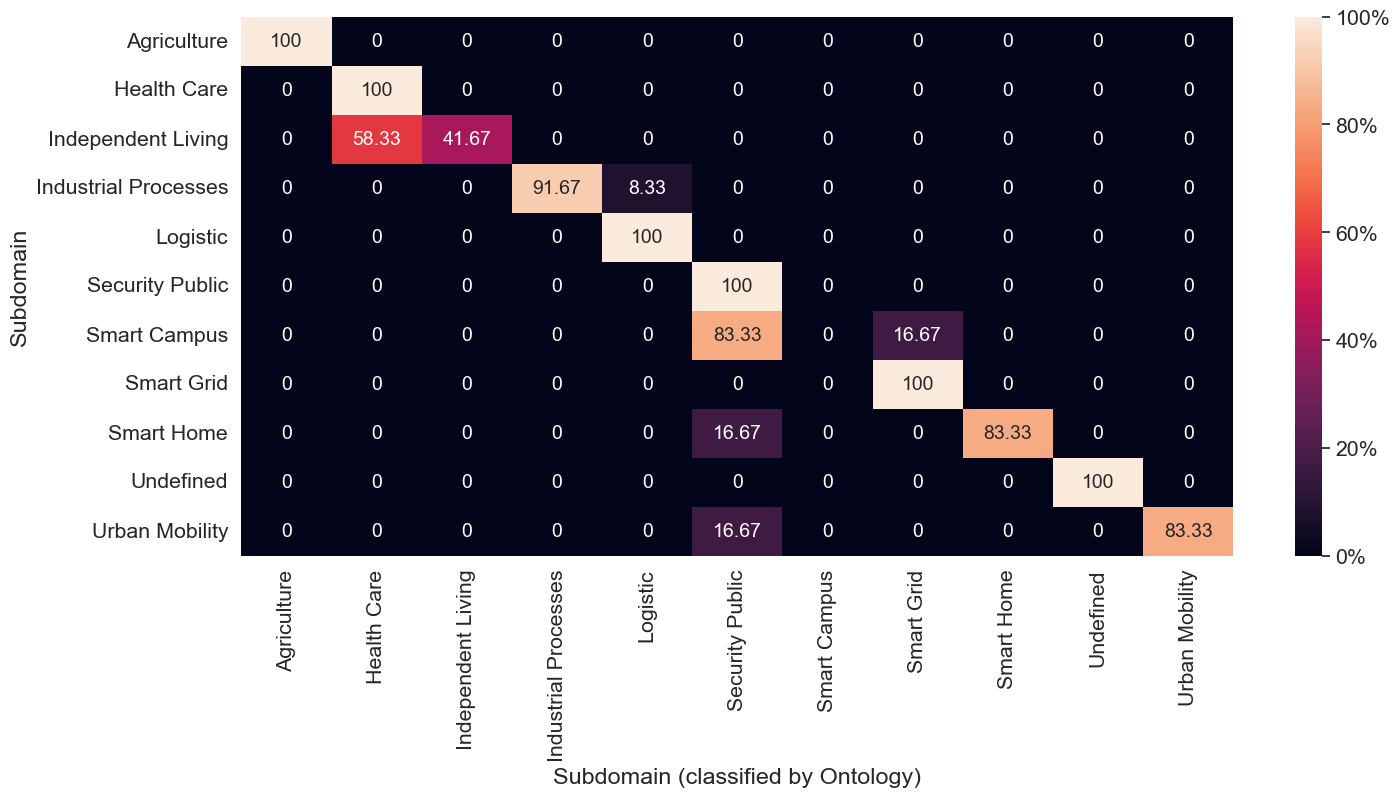

In [4]:
#Visualização Gráfica da Matriz de Confusão
import matplotlib.pyplot as plt
import seaborn as sns


report_matrix = report_matrix.rename(columns={"HealthCare": "Health Care", "IndependentLiving":"Independent Living", "IndustrialProcesses": "Industrial Processes",
                                  "SecurityPublic": "Security Public", "SmartCampus": "Smart Campus", "SmartGrid": "Smart Grid",
                                  "SmartHome": "Smart Home", "UrbanMobility": "Urban Mobility"},
                        index={"HealthCare": "Health Care", "IndependentLiving":"Independent Living", "IndustrialProcesses": "Industrial Processes",
                                  "SecurityPublic": "Security Public", "SmartCampus": "Smart Campus", "SmartGrid": "Smart Grid",
                                  "SmartHome": "Smart Home", "UrbanMobility": "Urban Mobility"})

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(report_matrix, annot=True, fmt='.4g', annot_kws={"size": 14}, cbar_kws={'format': '%.0f%%'}) # font size
ax.set(xlabel="Subdomain (classified by Ontology)", ylabel="Subdomain")
plt.show()

In [5]:
print(classification_report(y_true, y_pred))

                     precision    recall  f1-score   support

        Agriculture       1.00      1.00      1.00        12
         HealthCare       0.63      1.00      0.77        12
  IndependentLiving       1.00      0.42      0.59        12
IndustrialProcesses       1.00      0.92      0.96        12
           Logistic       0.92      1.00      0.96        12
     SecurityPublic       0.46      1.00      0.63        12
        SmartCampus       0.00      0.00      0.00        12
          SmartGrid       0.86      1.00      0.92        12
          SmartHome       1.00      0.83      0.91        12
          Undefined       1.00      1.00      1.00         1
      UrbanMobility       1.00      0.83      0.91        12

           accuracy                           0.80       121
          macro avg       0.81      0.82      0.79       121
       weighted avg       0.79      0.80      0.77       121



c:\Users\Flavio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Flavio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Flavio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera